# Euler, Improved Euler, Runge Kutta 
## 定义域 0-渐近线的部分


/var/folders/5m/pfpkdxb92zn626qpwt4l5vyh0000gn/T/ipykernel_50901/315705071.py:36: RuntimeWarning: overflow encountered in scalar power
  return y**3+t**3  # 定义微分方程 dy/dt = y


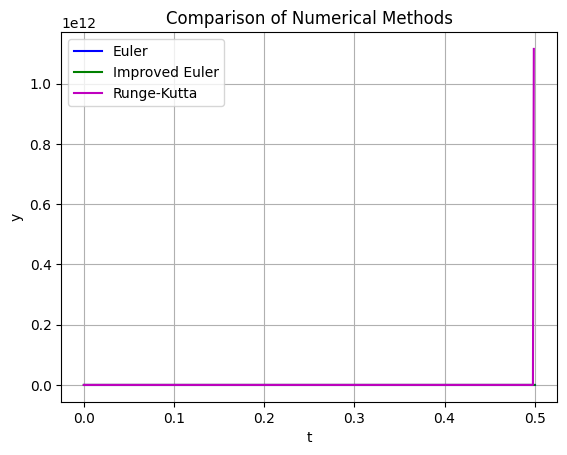

In [168]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f,y0,t0,tn,h):
    t=np.arange(t0,tn+h,h)
    y=np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        y[i+1]=y[i]+h*f(t[i],y[i])
    return t,y

def improved_euler(f,y0,t0,tn,h):
    t=np.arange(t0,tn+h,h)
    y=np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        y_hat = y[i] + h * f(t[i], y[i])
        
        # 校正步骤
        y[i+1] = y[i] + 0.5 * h * (f(t[i], y[i]) + f(t[i+1], y_hat))
    return t,y

def runge_kutta(f,y0,t0,tn,h):
    t=np.arange(t0,tn+h,h)
    y=np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        k1=h*f(t[i],y[i])
        k2=h*f(t[i]+h/2,y[i]+k1/2)
        k3=h*f(t[i]+h/2,y[i]+k2/2)
        k4=h*f(t[i]+h,y[i]+k3)
        y[i+1]=y[i]+(k1+2*k3+2*k3+k4)/6
    return t,y   

def f(t, y):
    return y**3+t**3  # 定义微分方程 dy/dt = y

t0=0
y0=1
tn=0.5
h=0.001

t,y1=euler(f,y0,t0,tn,h)
t,y2=improved_euler(f,y0,t0,tn,h)
t,y3=runge_kutta(f,y0,t0,tn,h)

# yture=np.exp(t)

plt.plot(t, y1, 'b-', label='Euler')
plt.plot(t, y2, 'g-', label='Improved Euler')
plt.plot(t, y3, 'm-', label='Runge-Kutta')
# plt.plot(t, ytrue, 'r-', label='True')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Numerical Methods')
plt.grid(True)
plt.show()


/var/folders/5m/pfpkdxb92zn626qpwt4l5vyh0000gn/T/ipykernel_35411/1171278915.py:10: RuntimeWarning: overflow encountered in scalar power
  val = y**3 + t**3


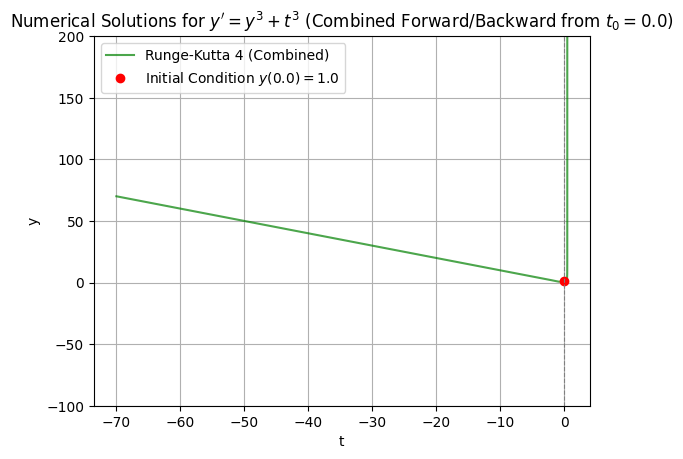

Runge-Kutta: t range [-70.00, 2.00], y range [6.95e-01, 2.35e+38]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation dy/dt = f(t, y)
def f_ode(t, y):
    # Handle potential overflow if y becomes too large
    if np.isinf(y) or np.abs(y) > 1e1000: # Stop if y is excessively large
        return np.nan
    try:
        val = y**3 + t**3
        if np.isinf(val): # Check if result of calculation is inf
            return np.nan
        return val
    except OverflowError:
        return np.nan


# --- Methods for Backward Integration (t decreases) ---
def euler_backward(f, y0, t0, t_final, h_step):
    # t_final is the target time, t_final < t0
    # h_step is the magnitude of the step (positive)
    t_pts = np.arange(t0, t_final - h_step, -h_step)
    y_pts = np.zeros_like(t_pts, dtype=float) # Use float for y_pts
    y_pts[0] = y0
    for i in range(len(t_pts) - 1):
        if np.isnan(y_pts[i]):
            y_pts[i+1:] = np.nan
            break
        val_f = f(t_pts[i], y_pts[i])
        if np.isnan(val_f):
            y_pts[i+1:] = np.nan
            break
        y_pts[i+1] = y_pts[i] - h_step * val_f
    return t_pts, y_pts

def improved_euler_backward(f, y0, t0, t_final, h_step):
    t_pts = np.arange(t0, t_final - h_step, -h_step)
    y_pts = np.zeros_like(t_pts, dtype=float)
    y_pts[0] = y0
    for i in range(len(t_pts) - 1):
        if np.isnan(y_pts[i]):
            y_pts[i+1:] = np.nan
            break
        
        f_ti_yi = f(t_pts[i], y_pts[i])
        if np.isnan(f_ti_yi):
            y_pts[i+1:] = np.nan
            break
            
        y_predictor = y_pts[i] - h_step * f_ti_yi
        if np.isnan(y_predictor):
            y_pts[i+1:] = np.nan
            break

        f_ti_plus_1_y_predictor = f(t_pts[i+1], y_predictor)
        if np.isnan(f_ti_plus_1_y_predictor):
            y_pts[i+1:] = np.nan
            break
            
        y_pts[i+1] = y_pts[i] - 0.5 * h_step * (f_ti_yi + f_ti_plus_1_y_predictor)
    return t_pts, y_pts

def runge_kutta_backward(f, y0, t0, t_final, h_step):
    t_pts = np.arange(t0, t_final - h_step, -h_step)
    y_pts = np.zeros_like(t_pts, dtype=float)
    y_pts[0] = y0
    for i in range(len(t_pts) - 1):
        ti, yi = t_pts[i], y_pts[i]
        if np.isnan(yi):
            y_pts[i+1:] = np.nan
            break

        k1_val = f(ti, yi)
        if np.isnan(k1_val): y_pts[i+1:] = np.nan; break
        k1 = h_step * k1_val

        k2_val = f(ti - h_step/2, yi - k1/2)
        if np.isnan(k2_val): y_pts[i+1:] = np.nan; break
        k2 = h_step * k2_val

        k3_val = f(ti - h_step/2, yi - k2/2)
        if np.isnan(k3_val): y_pts[i+1:] = np.nan; break
        k3 = h_step * k3_val
        
        k4_val = f(ti - h_step, yi - k3)
        if np.isnan(k4_val): y_pts[i+1:] = np.nan; break
        k4 = h_step * k4_val
        
        y_pts[i+1] = yi - (k1 + 2*k2 + 2*k3 + k4)/6
    return t_pts, y_pts


# --- Methods for Forward Integration (t increases) ---
def euler_forward(f, y0, t0, t_final, h_step):
    # t_final is the target time, t_final > t0
    # h_step is the magnitude of the step (positive)
    t_pts = np.arange(t0, t_final + h_step, h_step)
    y_pts = np.zeros_like(t_pts, dtype=float)
    y_pts[0] = y0
    for i in range(len(t_pts) - 1):
        if np.isnan(y_pts[i]):
            y_pts[i+1:] = np.nan
            break
        val_f = f(t_pts[i], y_pts[i])
        if np.isnan(val_f):
            y_pts[i+1:] = np.nan
            break
        y_pts[i+1] = y_pts[i] + h_step * val_f
    return t_pts, y_pts

def improved_euler_forward(f, y0, t0, t_final, h_step):
    t_pts = np.arange(t0, t_final + h_step, h_step)
    y_pts = np.zeros_like(t_pts, dtype=float)
    y_pts[0] = y0
    for i in range(len(t_pts) - 1):
        if np.isnan(y_pts[i]):
            y_pts[i+1:] = np.nan
            break

        f_ti_yi = f(t_pts[i], y_pts[i])
        if np.isnan(f_ti_yi):
            y_pts[i+1:] = np.nan
            break
            
        y_predictor = y_pts[i] + h_step * f_ti_yi
        if np.isnan(y_predictor):
            y_pts[i+1:] = np.nan
            break

        f_ti_plus_1_y_predictor = f(t_pts[i+1], y_predictor)
        if np.isnan(f_ti_plus_1_y_predictor):
            y_pts[i+1:] = np.nan
            break
            
        y_pts[i+1] = y_pts[i] + 0.5 * h_step * (f_ti_yi + f_ti_plus_1_y_predictor)
    return t_pts, y_pts

def runge_kutta_forward(f, y0, t0, t_final, h_step):
    t_pts = np.arange(t0, t_final + h_step, h_step)
    y_pts = np.zeros_like(t_pts, dtype=float)
    y_pts[0] = y0
    for i in range(len(t_pts) - 1):
        ti, yi = t_pts[i], y_pts[i]
        if np.isnan(yi):
            y_pts[i+1:] = np.nan
            break

        k1_val = f(ti, yi)
        if np.isnan(k1_val): y_pts[i+1:] = np.nan; break
        k1 = h_step * k1_val

        k2_val = f(ti + h_step/2, yi + k1/2)
        if np.isnan(k2_val): y_pts[i+1:] = np.nan; break
        k2 = h_step * k2_val

        k3_val = f(ti + h_step/2, yi + k2/2)
        if np.isnan(k3_val): y_pts[i+1:] = np.nan; break
        k3 = h_step * k3_val
        
        k4_val = f(ti + h_step, yi + k3)
        if np.isnan(k4_val): y_pts[i+1:] = np.nan; break
        k4 = h_step * k4_val
            
        y_pts[i+1] = yi + (k1 + 2*k2 + 2*k3 + k4)/6
    return t_pts, y_pts









##################################################################################################################################################################################################################
# # --- Set initial conditions and parameters ---
# t0 = 0.0
# y0 = 0.0
# # Define the time range for integration
# t_min = -70.0  # How far back in negative time
# t_max = 2   # How far forward in positive time (solution blows up around t=0.4 to 0.5)
# h = 0.0001     # Step size

# # --- Perform calculations ---

# # Backward calculations (from t0 to t_min)
# t_b_euler, y_b_euler = euler_backward(f_ode, y0, t0, t_min, h)
# t_b_ie, y_b_ie = improved_euler_backward(f_ode, y0, t0, t_min, h)
# t_b_rk, y_b_rk = runge_kutta_backward(f_ode, y0, t0, t_min, h)

# # Forward calculations (from t0 to t_max)
# # Note: For forward calculation, the first point (t0, y0) is already included
# # in backward results if we reverse them. So we can skip it for forward part when combining.
# # Or, we can compute it and then remove the duplicate t0.
# t_f_euler, y_f_euler = euler_forward(f_ode, y0, t0, t_max, h)
# t_f_ie, y_f_ie = improved_euler_forward(f_ode, y0, t0, t_max, h)
# t_f_rk, y_f_rk = runge_kutta_forward(f_ode, y0, t0, t_max, h)


# # --- Combine backward and forward results for plotting ---
# # Backward results are [t0, t0-h, ..., t_min]. We need to reverse them.
# # Forward results are [t0, t0+h, ..., t_max].
# # Concatenate: [t_min, ..., t0-h] + [t0] + [t0+h, ..., t_max]
# # Or [t_min, ..., t0-h, t0] + [t0+h, ..., t_max] (by taking [1:] from forward)

# def combine_results(t_b, y_b, t_f, y_f):
#     # t_b is [t0, t0-h, ... t_min], y_b matches
#     # t_f is [t0, t0+h, ... t_max], y_f matches
#     # We want combined time to be monotonic: [t_min, ..., t0, ..., t_max]
    
#     # Reverse backward part (so it goes from t_min to t0) and remove duplicate t0 from forward part
#     combined_t = np.concatenate((t_b[::-1], t_f[1:]))
#     combined_y = np.concatenate((y_b[::-1], y_f[1:]))
#     return combined_t, combined_y

# t_euler, y_euler = combine_results(t_b_euler, y_b_euler, t_f_euler, y_f_euler)
# t_ie, y_ie = combine_results(t_b_ie, y_b_ie, t_f_ie, y_f_ie)
# t_rk, y_rk = combine_results(t_b_rk, y_b_rk, t_f_rk, y_f_rk)

# # --- Plotting ---
# plt.figure(figsize=(12, 8))

# # plt.plot(t_euler, y_euler, 'b-', label='Euler (Combined)', alpha=0.7)
# plt.plot(t_ie, y_ie, 'g-', label='Improved Euler (Combined)', alpha=0.7)
# plt.plot(t_rk, y_rk, 'm-', label='Runge-Kutta 4 (Combined)', alpha=0.7)

# # Mark the initial condition
# plt.plot(t0, y0, 'ro', label=f'Initial Condition $y({t0})={y0}$')

# plt.xlabel('t')
# plt.ylabel('y')
# plt.title(f'Numerical Solutions for $y\' = y^3 + t^3$ (Combined Forward/Backward from $t_0={t0}$)')
# plt.legend()
# plt.grid(True)
# plt.ylim(-10, 200) # Adjust ylim if necessary, positive part blows up fast
# plt.axvline(t0, color='gray', linestyle='--', linewidth=0.8) # Line at t0

#################################################
# --- Set initial conditions and parameters ---
t0 = 0.0
y0 = 1.0
# Define the time range for integration
t_min = -70.0  # How far back in negative time
t_max = 2   # How far forward in positive time (solution blows up around t=0.4 to 0.5)
h = 0.0001     
y_min=-100
y_max=200




# t_b_euler, y_b_euler = euler_backward(f_ode, y0, t0, t_min, h)

# t_b_ie, y_b_ie = improved_euler_backward(f_ode, y0, t0, t_min, h)
t_b_rk, y_b_rk = runge_kutta_backward(f_ode, y0, t0, t_min, h)

# Forward calculations (from t0 to t_max)
# Note: For forward calculation, the first point (t0, y0) is already included
# in backward results if we reverse them. So we can skip it for forward part when combining.
# Or, we can compute it and then remove the duplicate t0.
# t_f_euler, y_f_euler = euler_forward(f_ode, y0, t0, t_max, h)
# t_f_ie, y_f_ie = improved_euler_forward(f_ode, y0, t0, t_max, h)
t_f_rk, y_f_rk = runge_kutta_forward(f_ode, y0, t0, t_max, h)


# --- Combine backward and forward results for plotting ---
# Backward results are [t0, t0-h, ..., t_min]. We need to reverse them.
# Forward results are [t0, t0+h, ..., t_max].
# Concatenate: [t_min, ..., t0-h] + [t0] + [t0+h, ..., t_max]
# Or [t_min, ..., t0-h, t0] + [t0+h, ..., t_max] (by taking [1:] from forward)

def combine_results(t_b, y_b, t_f, y_f):
    # t_b is [t0, t0-h, ... t_min], y_b matches
    # t_f is [t0, t0+h, ... t_max], y_f matches
    # We want combined time to be monotonic: [t_min, ..., t0, ..., t_max]
    
    # Reverse backward part (so it goes from t_min to t0) and remove duplicate t0 from forward part
    combined_t = np.concatenate((t_b[::-1], t_f[1:]))
    combined_y = np.concatenate((y_b[::-1], y_f[1:]))
    return combined_t, combined_y

# t_euler, y_euler = combine_results(t_b_euler, y_b_euler, t_f_euler, y_f_euler)
# t_ie, y_ie = combine_results(t_b_ie, y_b_ie, t_f_ie, y_f_ie)
t_rk, y_rk = combine_results(t_b_rk, y_b_rk, t_f_rk, y_f_rk)

# --- Plotting ---

# plt.plot(t_euler, y_euler, 'b-', label='Euler (Combined)', alpha=0.7)
# plt.plot(t_ie, y_ie, 'b-', label='Improved Euler (Combined)-2', alpha=0.7)
plt.plot(t_rk, y_rk, 'g-', label='Runge-Kutta 4 (Combined)', alpha=0.7)

# Mark the initial condition
plt.plot(t0, y0, 'ro', label=f'Initial Condition $y({t0})={y0}$')

plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Numerical Solutions for $y\' = y^3 + t^3$ (Combined Forward/Backward from $t_0={t0}$)')
plt.legend()
plt.grid(True)
plt.ylim(y_min
         , y_max) # Adjust ylim if necessary, positive part blows up fast
plt.axvline(t0, color='gray', linestyle='--', linewidth=0.8) # Line at t0
plt.show()

# Print some info about the solution ranges
# print(f"Euler: t range [{t_euler[0]:.2f}, {t_euler[-1]:.2f}], y range [{np.nanmin(y_euler):.2e}, {np.nanmax(y_euler):.2e}]")
# print(f"Improved Euler: t range [{t_ie[0]:.2f}, {t_ie[-1]:.2f}], y range [{np.nanmin(y_ie):.2e}, {np.nanmax(y_ie):.2e}]")
print(f"Runge-Kutta: t range [{t_rk[0]:.2f}, {t_rk[-1]:.2f}], y range [{np.nanmin(y_rk):.2e}, {np.nanmax(y_rk):.2e}]")

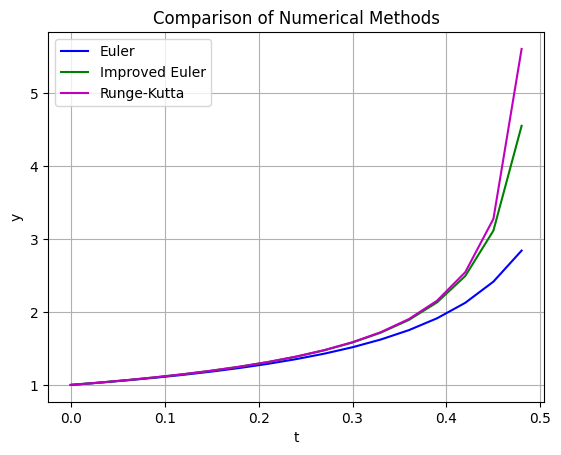

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f,y0,t0,tn,h):
    t=np.arange(t0,tn+h,h)
    y=np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        y[i+1]=y[i]+h*f(t[i],y[i])
    return t,y

def improved_euler(f,y0,t0,tn,h):
    t=np.arange(t0,tn+h,h)
    y=np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        y_hat = y[i] + h * f(t[i], y[i])
        
        # 校正步骤
        y[i+1] = y[i] + 0.5 * h * (f(t[i], y[i]) + f(t[i+1], y_hat))
    return t,y

def runge_kutta(f,y0,t0,tn,h):
    t=np.arange(t0,tn+h,h)
    y=np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        k1=h*f(t[i],y[i])
        k2=h*f(t[i]+h/2,y[i]+k1/2)
        k3=h*f(t[i]+h/2,y[i]+k2/2)
        k4=h*f(t[i]+h,y[i]+k3)
        y[i+1]=y[i]+(k1+2*k3+2*k3+k4)/6
    return t,y   

def f(t, y):
    return y**3+t**3  # 定义微分方程 dy/dt = y

t0=0
y0=1
tn=0.47
h=0.03

t,y1=euler(f,y0,t0,tn,h)
t,y2=improved_euler(f,y0,t0,tn,h)
t,y3=runge_kutta(f,y0,t0,tn,h)

# yture=np.exp(t)

plt.plot(t, y1, 'b-', label='Euler')
plt.plot(t, y2, 'g-', label='Improved Euler')
plt.plot(t, y3, 'm-', label='Runge-Kutta')
# plt.plot(t, ytrue, 'r-', label='True')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Numerical Methods')
plt.grid(True)
plt.show()


# Euler, Improved Euler, Runge Kutta 
## 定义域2 0左边的部分

t0 = 0
y0 = 1
t_low = -3  # 向左推算到 t = -2
h = 0.08

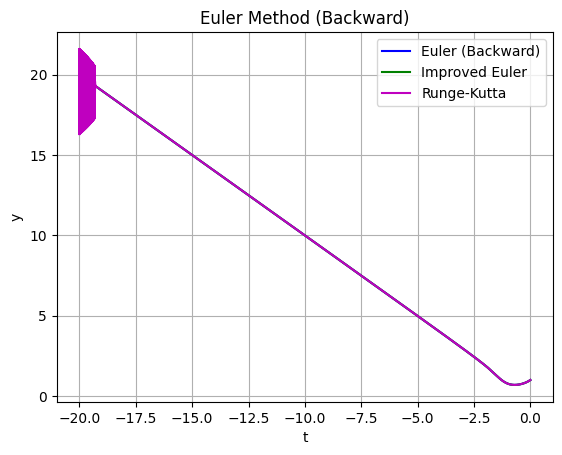

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler_backward(f, y0, t0, t_low, h):
    t = np.arange(t0, t_low - h, -h)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(len(t) - 1):
        y[i + 1] = y[i] - h * f(t[i], y[i])
    return t, y


def improved_euler(f, y0, t0, t_low, h):
    t = np.arange(t0, t_low - h, -h)
    y = np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        y_hat = y[i] - h * f(t[i], y[i])
        
        # 校正步骤
        y[i+1] = y[i] - 0.5 * h * (f(t[i], y[i]) + f(t[i+1], y_hat))
    return t,y

def runge_kutta(ff, y0, t0, t_low, h):
    t = np.arange(t0, t_low - h, -h)
    y = np.zeros_like(t)
    y[0]=y0
    for i in range(len(t)-1):
        k1=h*f(t[i],y[i])
        k2=h*f(t[i]+h/2,y[i]+k1/2)
        k3=h*f(t[i]+h/2,y[i]+k2/2)
        k4=h*f(t[i]+h,y[i]+k3)
        y[i+1]=y[i]-(k1+2*k3+2*k3+k4)/6
    return t,y   

def f(t, y):
    return y**3+t**3  # 定义微分方程 dy/dt =


# def f(t, y):
#     return y  # 示例微分方程 dy/dt = y

# 设置初始条件和参数
t0 = 0
y0 = 1
t_low = -20 # 向左推算到 t = -2
h = 0.001

# 计算向左的 Euler 方法数值解
t_backward, y_backward = euler_backward(f, y0, t0, t_low, h)
t_backward, y_backward2 = improved_euler(f, y0, t0, t_low, h)
t_backward, y_backward3 = runge_kutta(f, y0, t0, t_low, h)

# 绘制结果
plt.plot(t_backward, y_backward, 'b-', label='Euler (Backward)')
plt.plot(t_backward, y_backward2, 'g-', label='Improved Euler')
plt.plot(t_backward, y_backward3, 'm-', label='Runge-Kutta')

plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler Method (Backward)')
plt.legend()
plt.grid(True)
plt.show()

# Picard


Picard iteration did not converge after 1 iterations
Picard iteration did not converge after 2 iterations
Picard iteration did not converge after 3 iterations
Picard iteration did not converge after 4 iterations
Picard iteration did not converge after 5 iterations
Picard iteration did not converge after 6 iterations


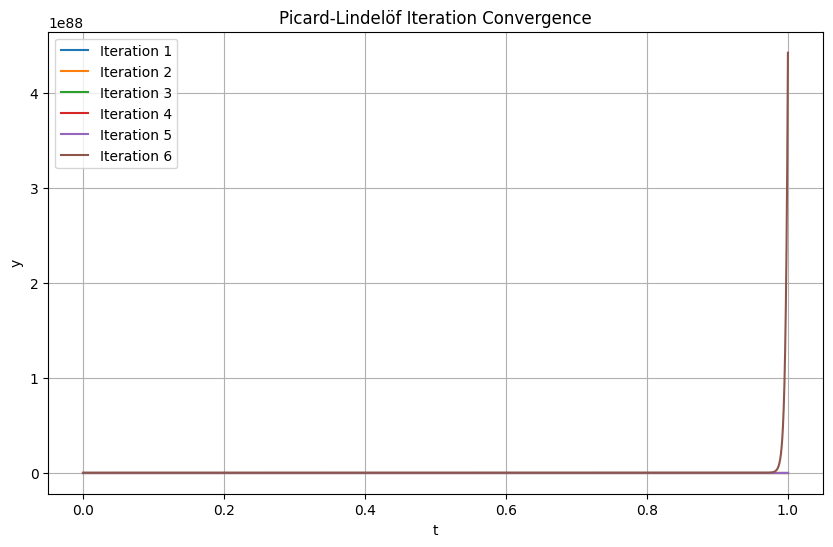

In [17]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import math
def picard_lindelof_iteration(f, y0, t, max_iter=100, tol=1e-6):


    # 初始化解数组
    y = np.zeros_like(t)
    y_prev = np.zeros_like(t)
    
    # 初始猜测（通常为常函数 y0）
    y_prev.fill(y0)
    
    for iteration in range(max_iter):
        # 皮卡迭代更新
        for i in range(len(t)):
            # 在 t=0 处，解为初始值
            if i == 0:
                y[i] = y0
            else:
                # 积分计算：y(t) = y0 + ∫₀ᵗ f(s, y_prev(s)) ds
                y[i] = y0 + integrate.quad(lambda s: f(s, y_prev[i-1]), t[0], t[i])[0]
        
        # 打印当前迭代的 y 值
        # print(f"Iteration {iteration + 1}: y = {y}") 
        
        # 检查收敛性
        if np.max(np.abs(y - y_prev)) < tol:
            print(f"Picard iteration converged in {iteration+1} iterations")
            return y
        
        # 更新前一次迭代结果
        y_prev = np.copy(y)
    
    print(f"Picard iteration did not converge after {max_iter} iterations")
    return y


# 示例：测试皮卡迭代法
if __name__ == "__main__":
    # 定义常微分方程 y' = y，解为 y(t) = e^t

    def f(t, y):
        return y**3+t**3
    
    # 参数设置
    
    tn=1
    h=0.001


    y0 = 1.0   # 初始条件 y(0) = 1  

    s=math.ceil(tn/h) # 天花板函数

    t = np.linspace(0, tn, s)  # 时间点

    
    # 绘制不同迭代次数的解
    plt.figure(figsize=(10, 6))
    for i in range(6):
        yi = picard_lindelof_iteration(f, y0, t, max_iter=i+1)
        plt.plot(t, yi, label=f'Iteration {i+1}')
        

    
    # 绘制解析解
    # exact_solution = np.exp(t)
    # plt.plot(t, exact_solution, 'r--', label='Exact Solution')
    
    # 添加图例和标签
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Picard-Lindelöf Iteration Convergence')
    plt.grid(True)
    plt.show()

# 分析

1. 首先右边肯定是有渐近线，然后左边可能有渐近线，也可能没有，但是我现在不是很确定。


例如f=y**2得到y=1/(c-t)那么渐近线就是c

然后在0-渐近线之前的图像需要展示一下


现在观察，似乎 0.5是渐近线

前三种在这个点都趋近了正无穷，然后picard这个我看不出来，不会


2. 0左边的图像需要展示一下，但是我现在不知道做出来这部分的图像




3. 这个题的解析解需要大致算出来



4. 初值有-1,0,1需要分别考虑




<!-- t0=0
y0=1
tn=0.47
h=0.03 -->




Processing for y(0) = 0
  Forward integration for y0=0 stopped at t=1.646523, y=1.74e+06. Status: -1. Message: Required step size is less than spacing between numbers.
  Extrapolated forward asymptote b for y0=0: 1.646523
  Backward integration for y0=0 reached -t_span_limit=-20 without apparent blow-up. y_final=2.00e+01
  For y(0) = 0, estimated domain: (-inf, 1.646523)

Processing for y(0) = 1
  Forward integration for y0=1 stopped at t=0.498290, y=3.49e+06. Status: -1. Message: Required step size is less than spacing between numbers.
  Extrapolated forward asymptote b for y0=1: 0.498290
  Backward integration for y0=1 reached -t_span_limit=-20 without apparent blow-up. y_final=2.00e+01
  For y(0) = 1, estimated domain: (-inf, 0.498290)

Processing for y(0) = -1
  Forward integration for y0=-1 stopped at t=0.501754, y=-2.47e+06. Status: -1. Message: Required step size is less than spacing between numbers.
  Extrapolated forward asymptote b for y0=-1: 0.501754
  Backward integration 

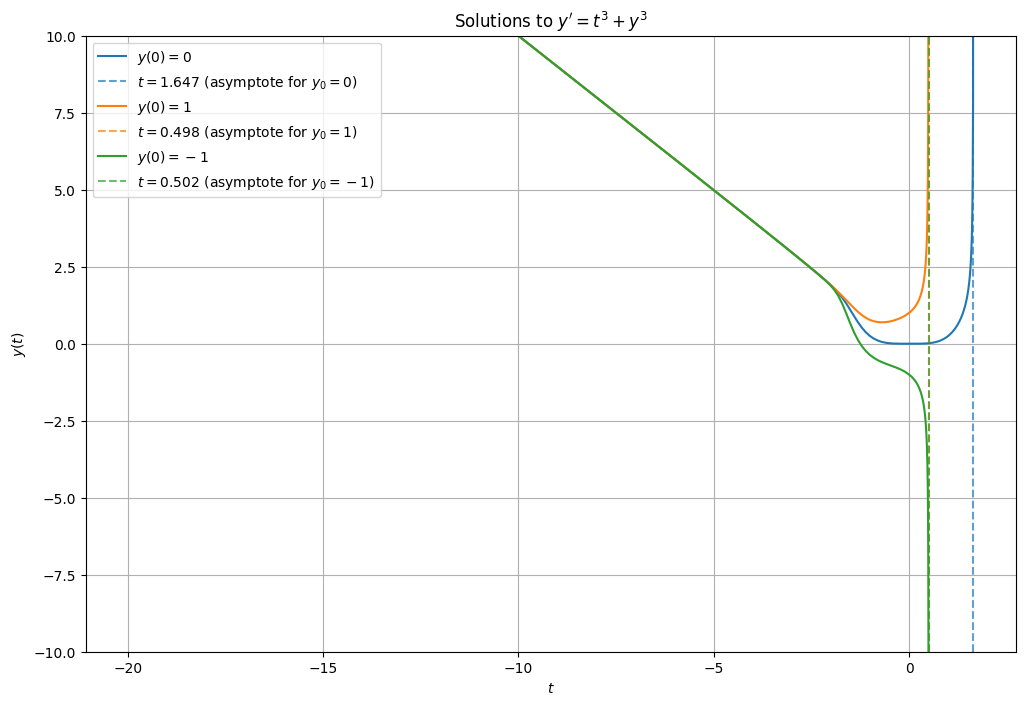


Summary of Maximal Solution Domains:
For y(0) = 0: Domain = (-inf, 1.646523)
For y(0) = 1: Domain = (-inf, 0.498290)
For y(0) = -1: Domain = (-inf, 0.501754)


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_func(t, y):
    return t**3 + y**3

# Initial conditions
y0_values = [0, 1, -1]

# Store results: {'y0': {'sol_fwd': sol_fwd, 'sol_bwd': sol_bwd, 'a': a, 'b': b}}
results = {}

# Integration parameters
t_span_limit = 20  # Max integration time in each direction (can be adjusted)
rtol = 1e-9        # Relative tolerance
atol = 1e-12       # Absolute tolerance (important for reaching asymptotes accurately)
# Using a large value for y to stop integration is an option,
# but solve_ivp often handles blow-up by itself by reducing step size until failure.
# We can check sol.status and sol.message.




for y0_val in y0_values:
    print(f"\nProcessing for y(0) = {y0_val}")


    # Forward integration
    # Integrate from t=0 to t_span_limit
    # If it blows up, sol_fwd.t[-1] is an estimate of b
    # We need to make sure t_span is large enough to pass the asymptote if one exists.
    # solve_ivp will stop if it can't proceed (e.g. asymptote)
    sol_fwd = solve_ivp(ode_func, [0, t_span_limit], [y0_val],
                        dense_output=True, rtol=rtol, atol=atol, method='Radau') # Radau is good for stiff problems

    b_asymptote = np.inf
    if sol_fwd.status == 0 and sol_fwd.t[-1] < t_span_limit : # solver might have stopped before t_span_limit due to reaching max_step or other reasons not blowup
         print(f"  Forward integration for y0={y0_val} finished early at t={sol_fwd.t[-1]} but status is 0, message: {sol_fwd.message}. This might indicate it did not blow up or needs longer t_span.")
         # If it truly didn't blow up, b is inf. Otherwise, it might be an issue with solver params or t_span_limit.
         # For this problem, blow-up is expected if y gets large.
         if abs(sol_fwd.y[0,-1]) < 1e6: # Arbitrary threshold to decide if it's not a blow up
            b_asymptote = np.inf
         else: # Assume it was on its way to blow up but stopped.
             t_last_fwd = sol_fwd.t[-1]
             y_last_fwd = sol_fwd.y[0, -1]
             if abs(y_last_fwd) > 1e3 : # Check if y is large enough for extrapolation
                 b_asymptote = t_last_fwd + 1.0 / (2.0 * y_last_fwd**2) if y_last_fwd !=0 else t_last_fwd # to avoid division by zero
                 print(f"  Extrapolated forward asymptote b for y0={y0_val}: {b_asymptote:.6f} from t_last={t_last_fwd:.6f}, y_last={y_last_fwd:.2e}")
             else:
                 print(f"  Forward solution for y0={y0_val} ended at t={t_last_fwd:.6f}, y={y_last_fwd:.2e}, y not large enough for robust extrapolation.")
                 b_asymptote = t_last_fwd # Best guess is where it stopped.
    elif sol_fwd.t[-1] < t_span_limit:  # Solver stopped early, likely due to stiffness/blow-up (status != 0)


        t_last_fwd = sol_fwd.t[-1]
        y_last_fwd = sol_fwd.y[0, -1]
        # Extrapolation for right asymptote b: b_approx = t_last + 1/(2*y_last^2)
        # This formula is for y' ~ y^3.
        # Need to be careful if y_last is small or zero.
        if abs(y_last_fwd) > 1e3: # Check if y is large enough for extrapolation
            b_asymptote = t_last_fwd + 1.0 / (2.0 * y_last_fwd**2)
            print(f"  Forward integration for y0={y0_val} stopped at t={t_last_fwd:.6f}, y={y_last_fwd:.2e}. Status: {sol_fwd.status}. Message: {sol_fwd.message}")
            print(f"  Extrapolated forward asymptote b for y0={y0_val}: {b_asymptote:.6f}")
        else:
            print(f"  Forward integration for y0={y0_val} stopped at t={t_last_fwd:.6f}, y={y_last_fwd:.2e}, y not large enough for robust extrapolation. Status: {sol_fwd.status}. Message: {sol_fwd.message}")
            b_asymptote = t_last_fwd # Best guess is where it stopped.
    else: # Reached t_span_limit
        print(f"  Forward integration for y0={y0_val} reached t_span_limit={t_span_limit} without apparent blow-up. y_final={sol_fwd.y[0,-1]:.2e}")
        b_asymptote = np.inf






    # Backward integration
    # Integrate from t=0 to -t_span_limit
    sol_bwd = solve_ivp(ode_func, [0, -t_span_limit], [y0_val],
                        dense_output=True, rtol=rtol, atol=atol, method='Radau')

    a_asymptote = -np.inf
    if sol_bwd.status == 0 and sol_bwd.t[-1] > -t_span_limit:
        print(f"  Backward integration for y0={y0_val} finished early at t={sol_bwd.t[-1]} but status is 0, message: {sol_bwd.message}. This might indicate it did not blow up or needs longer t_span.")
        if abs(sol_bwd.y[0,-1]) < 1e6:
             a_asymptote = -np.inf
        else:
            t_last_bwd = sol_bwd.t[-1]
            y_last_bwd = sol_bwd.y[0, -1]
            if abs(y_last_bwd) > 1e3:
                a_asymptote = t_last_bwd - 1.0 / (2.0 * y_last_bwd**2) if y_last_bwd != 0 else t_last_bwd
                print(f"  Extrapolated backward asymptote a for y0={y0_val}: {a_asymptote:.6f} from t_last={t_last_bwd:.6f}, y_last={y_last_bwd:.2e}")
            else:
                print(f"  Backward solution for y0={y0_val} ended at t={t_last_bwd:.6f}, y={y_last_bwd:.2e}, y not large enough for robust extrapolation.")
                a_asymptote = t_last_bwd
    elif sol_bwd.t[-1] > -t_span_limit:  # Solver stopped early
        t_last_bwd = sol_bwd.t[-1]
        y_last_bwd = sol_bwd.y[0, -1]
        # Extrapolation for left asymptote a: a_approx = t_last - 1/(2*y_last^2)
        if abs(y_last_bwd) > 1e3:
            a_asymptote = t_last_bwd - 1.0 / (2.0 * y_last_bwd**2)
            print(f"  Backward integration for y0={y0_val} stopped at t={t_last_bwd:.6f}, y={y_last_bwd:.2e}. Status: {sol_bwd.status}. Message: {sol_bwd.message}")
            print(f"  Extrapolated backward asymptote a for y0={y0_val}: {a_asymptote:.6f}")
        else:
            print(f"  Backward integration for y0={y0_val} stopped at t={t_last_bwd:.6f}, y={y_last_bwd:.2e}, y not large enough for robust extrapolation. Status: {sol_bwd.status}. Message: {sol_bwd.message}")
            a_asymptote = t_last_bwd
    else: # Reached -t_span_limit
        print(f"  Backward integration for y0={y0_val} reached -t_span_limit={-t_span_limit} without apparent blow-up. y_final={sol_bwd.y[0,-1]:.2e}")
        a_asymptote = -np.inf

    results[y0_val] = {
        'sol_fwd': sol_fwd,
        'sol_bwd': sol_bwd,
        'a': a_asymptote,
        'b': b_asymptote,
        'domain': (a_asymptote, b_asymptote)
    }

    print(f"  For y(0) = {y0_val}, estimated domain: ({a_asymptote:.6f}, {b_asymptote:.6f})")

# Plotting the solutions
plt.figure(figsize=(12, 8))
for y0_val, res in results.items():
    sol_fwd = res['sol_fwd']
    sol_bwd = res['sol_bwd']
    a = res['a']
    b = res['b']

    # Forward solution plot
    t_plot_fwd = np.linspace(0, sol_fwd.t[-1], 200) # ensure plotting up to where solver stopped
    if b != np.inf and b < sol_fwd.t[-1] + 1/(2*sol_fwd.y[0,-1]**2+1e-9): # A bit of a hack to ensure linspace is valid
        # if extrapolated b is very close to sol_fwd.t[-1] or slightly less due to numerical precision in extrapolation.
        # ensure t_plot_fwd doesn't exceed b by much if b is the true limit
        t_plot_fwd = np.linspace(0, min(sol_fwd.t[-1], b if b >0 else sol_fwd.t[-1] ), 200)


    y_plot_fwd = sol_fwd.sol(t_plot_fwd)[0]

    # Backward solution plot
    t_plot_bwd = np.linspace(sol_bwd.t[-1], 0, 200) # ensure plotting up to where solver stopped
    if a != -np.inf and a > sol_bwd.t[-1] - 1/(2*sol_bwd.y[0,-1]**2+1e-9) :
         t_plot_bwd = np.linspace(max(sol_bwd.t[-1], a if a < 0 else sol_bwd.t[-1]), 0, 200)


    y_plot_bwd = sol_bwd.sol(t_plot_bwd)[0]

    # Combine and remove duplicates, sort by time
    t_combined = np.concatenate((t_plot_bwd[:-1], t_plot_fwd)) # Avoid duplicating t=0
    y_combined = np.concatenate((y_plot_bwd[:-1], y_plot_fwd))

    # Sort by t for correct plotting
    sort_indices = np.argsort(t_combined)
    t_combined = t_combined[sort_indices]
    y_combined = y_combined[sort_indices]
    
    # Filter out extreme values if they mess up the plot too much before reaching asymptote line
    # y_combined = np.clip(y_combined, -50, 50) # Optional: for better visualization if blowup is too fast

    plt.plot(t_combined, y_combined, label=f'$y(0) = {y0_val}$')

    if b != np.inf:
        plt.axvline(x=b, linestyle='--', color=plt.gca().lines[-1].get_color(), alpha=0.7, label=f'$t={b:.3f}$ (asymptote for $y_0={y0_val}$)')
    if a != -np.inf:
        plt.axvline(x=a, linestyle='--', color=plt.gca().lines[-1].get_color(), alpha=0.7, label=f'$t={a:.3f}$ (asymptote for $y_0={y0_val}$)')


plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Solutions to $y\' = t^3 + y^3$')
plt.legend(loc='best')
plt.grid(True)
plt.ylim([-10, 10]) # Adjust ylim for better visualization of behavior near origin; asymptotes make it hard to see all details.
plt.show()

# Print summary of domains
print("\nSummary of Maximal Solution Domains:")
for y0_val, res in results.items():
    print(f"For y(0) = {y0_val}: Domain = ({res['domain'][0]:.6f}, {res['domain'][1]:.6f})")


Processing for y(0) = 0
  Forward integration for y0=0 stopped at t=1.646523, y=1.74e+06. Status: -1. Message: Required step size is less than spacing between numbers.
  Extrapolated forward asymptote b for y0=0: 1.646523
  Backward integration for y0=0 reached -t_span_limit=-5 without apparent blow-up. y_final=4.99e+00
  For y(0) = 0, estimated domain: (-inf, 1.646523)

Processing for y(0) = 1
  Forward integration for y0=1 stopped at t=0.498290, y=3.49e+06. Status: -1. Message: Required step size is less than spacing between numbers.
  Extrapolated forward asymptote b for y0=1: 0.498290
  Backward integration for y0=1 reached -t_span_limit=-5 without apparent blow-up. y_final=4.99e+00
  For y(0) = 1, estimated domain: (-inf, 0.498290)

Processing for y(0) = -1
  Forward integration for y0=-1 stopped at t=0.501754, y=-2.47e+06. Status: -1. Message: Required step size is less than spacing between numbers.
  Extrapolated forward asymptote b for y0=-1: 0.501754
  Backward integration fo

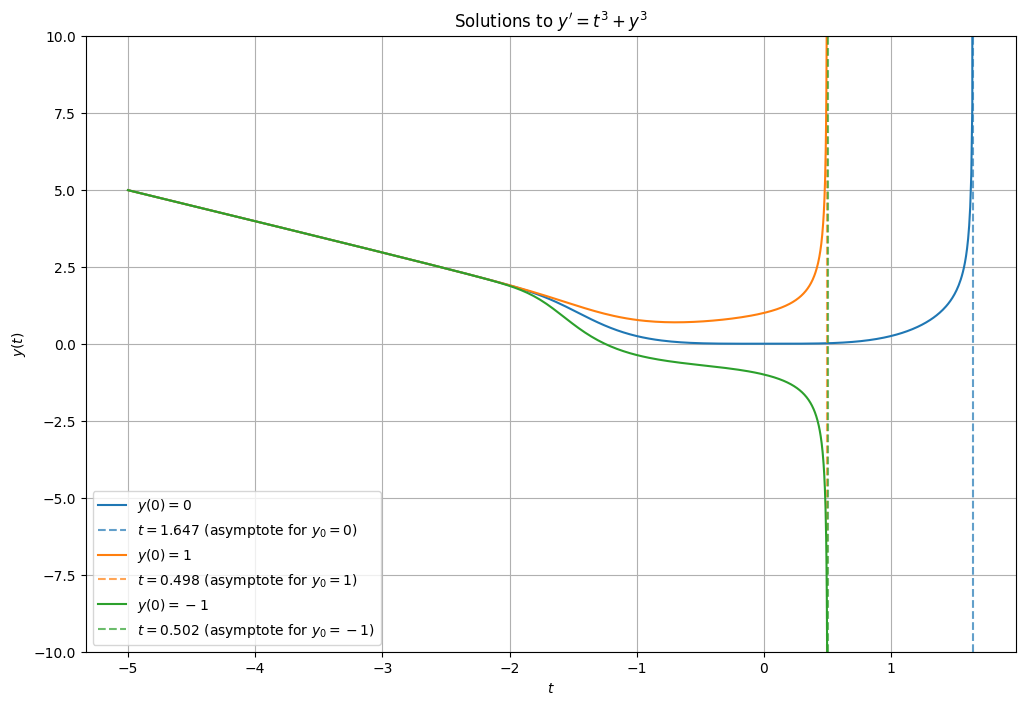


Summary of Maximal Solution Domains:
For y(0) = 0: Domain = (-inf, 1.646523)
For y(0) = 1: Domain = (-inf, 0.498290)
For y(0) = -1: Domain = (-inf, 0.501754)


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_func(t, y):
    return t**3 + y**3

# Initial conditions
y0_values = [0, 1, -1]


# Store results: {'y0': {'sol_fwd': sol_fwd, 'sol_bwd': sol_bwd, 'a': a, 'b': b}}
results = {}



# Integration parameters
t_span_limit = 200  # Max integration time in each direction (can be adjusted)
rtol = 1e-9        # Relative tolerance
atol = 1e-12       # Absolute tolerance (important for reaching asymptotes accurately)
# Using a large value for y to stop integration is an option,
# but solve_ivp often handles blow-up by itself by reducing step size until failure.
# We can check sol.status and sol.message.




for y0_val in y0_values:
    print(f"\nProcessing for y(0) = {y0_val}")


    # Forward integration
    # Integrate from t=0 to t_span_limit
    # If it blows up, sol_fwd.t[-1] is an estimate of b
    # We need to make sure t_span is large enough to pass the asymptote if one exists.
    # solve_ivp will stop if it can't proceed (e.g. asymptote)
    sol_fwd = solve_ivp(ode_func, [0, t_span_limit], [y0_val],
                        dense_output=True, rtol=rtol, atol=atol, method='Radau') # Radau is good for stiff problems

    b_asymptote = np.inf
    if sol_fwd.status == 0 and sol_fwd.t[-1] < t_span_limit : # solver might have stopped before t_span_limit due to reaching max_step or other reasons not blowup
         print(f"  Forward integration for y0={y0_val} finished early at t={sol_fwd.t[-1]} but status is 0, message: {sol_fwd.message}. This might indicate it did not blow up or needs longer t_span.")
         # If it truly didn't blow up, b is inf. Otherwise, it might be an issue with solver params or t_span_limit.
         # For this problem, blow-up is expected if y gets large.
         if abs(sol_fwd.y[0,-1]) < 1e6: # Arbitrary threshold to decide if it's not a blow up
            b_asymptote = np.inf
         else: # Assume it was on its way to blow up but stopped.
             t_last_fwd = sol_fwd.t[-1]
             y_last_fwd = sol_fwd.y[0, -1]
             if abs(y_last_fwd) > 1e3 : # Check if y is large enough for extrapolation
                 b_asymptote = t_last_fwd + 1.0 / (2.0 * y_last_fwd**2) if y_last_fwd !=0 else t_last_fwd # to avoid division by zero
                 print(f"  Extrapolated forward asymptote b for y0={y0_val}: {b_asymptote:.6f} from t_last={t_last_fwd:.6f}, y_last={y_last_fwd:.2e}")
             else:
                 print(f"  Forward solution for y0={y0_val} ended at t={t_last_fwd:.6f}, y={y_last_fwd:.2e}, y not large enough for robust extrapolation.")
                 b_asymptote = t_last_fwd # Best guess is where it stopped.
    elif sol_fwd.t[-1] < t_span_limit:  # Solver stopped early, likely due to stiffness/blow-up (status != 0)


        t_last_fwd = sol_fwd.t[-1]
        y_last_fwd = sol_fwd.y[0, -1]
        # Extrapolation for right asymptote b: b_approx = t_last + 1/(2*y_last^2)
        # This formula is for y' ~ y^3.
        # Need to be careful if y_last is small or zero.
        if abs(y_last_fwd) > 1e3: # Check if y is large enough for extrapolation
            b_asymptote = t_last_fwd + 1.0 / (2.0 * y_last_fwd**2)
            print(f"  Forward integration for y0={y0_val} stopped at t={t_last_fwd:.6f}, y={y_last_fwd:.2e}. Status: {sol_fwd.status}. Message: {sol_fwd.message}")
            print(f"  Extrapolated forward asymptote b for y0={y0_val}: {b_asymptote:.6f}")
        else:
            print(f"  Forward integration for y0={y0_val} stopped at t={t_last_fwd:.6f}, y={y_last_fwd:.2e}, y not large enough for robust extrapolation. Status: {sol_fwd.status}. Message: {sol_fwd.message}")
            b_asymptote = t_last_fwd # Best guess is where it stopped.
    else: # Reached t_span_limit
        print(f"  Forward integration for y0={y0_val} reached t_span_limit={t_span_limit} without apparent blow-up. y_final={sol_fwd.y[0,-1]:.2e}")
        b_asymptote = np.inf






    # Backward integration
    # Integrate from t=0 to -t_span_limit
    
    sol_bwd = solve_ivp(ode_func, [0, -t_span_limit], [y0_val],
                        dense_output=True, rtol=rtol, atol=atol, method='Radau')

    a_asymptote = -np.inf

    if sol_bwd.status == 0 and sol_bwd.t[-1] > -t_span_limit:
        print(f"  Backward integration for y0={y0_val} finished early at t={sol_bwd.t[-1]} but status is 0, message: {sol_bwd.message}. This might indicate it did not blow up or needs longer t_span.")
        if abs(sol_bwd.y[0,-1]) < 1e6:
             a_asymptote = -np.inf
        else:
            t_last_bwd = sol_bwd.t[-1]
            y_last_bwd = sol_bwd.y[0, -1]
            if abs(y_last_bwd) > 1e3:
                a_asymptote = t_last_bwd - 1.0 / (2.0 * y_last_bwd**2) if y_last_bwd != 0 else t_last_bwd
                print(f"  Extrapolated backward asymptote a for y0={y0_val}: {a_asymptote:.6f} from t_last={t_last_bwd:.6f}, y_last={y_last_bwd:.2e}")
            else:
                print(f"  Backward solution for y0={y0_val} ended at t={t_last_bwd:.6f}, y={y_last_bwd:.2e}, y not large enough for robust extrapolation.")
                a_asymptote = t_last_bwd


    elif sol_bwd.t[-1] > -t_span_limit:  # Solver stopped early
        t_last_bwd = sol_bwd.t[-1]
        y_last_bwd = sol_bwd.y[0, -1]
        # Extrapolation for left asymptote a: a_approx = t_last - 1/(2*y_last^2)
        if abs(y_last_bwd) > 1e3:
            a_asymptote = t_last_bwd - 1.0 / (2.0 * y_last_bwd**2)
            print(f"  Backward integration for y0={y0_val} stopped at t={t_last_bwd:.6f}, y={y_last_bwd:.2e}. Status: {sol_bwd.status}. Message: {sol_bwd.message}")
            print(f"  Extrapolated backward asymptote a for y0={y0_val}: {a_asymptote:.6f}")
        else:
            print(f"  Backward integration for y0={y0_val} stopped at t={t_last_bwd:.6f}, y={y_last_bwd:.2e}, y not large enough for robust extrapolation. Status: {sol_bwd.status}. Message: {sol_bwd.message}")
            a_asymptote = t_last_bwd
    else: # Reached -t_span_limit
        print(f"  Backward integration for y0={y0_val} reached -t_span_limit={-t_span_limit} without apparent blow-up. y_final={sol_bwd.y[0,-1]:.2e}")
        a_asymptote = -np.inf

    results[y0_val] = {
        'sol_fwd': sol_fwd,
        'sol_bwd': sol_bwd,
        'a': a_asymptote,
        'b': b_asymptote,
        'domain': (a_asymptote, b_asymptote)
    }

    print(f"  For y(0) = {y0_val}, estimated domain: ({a_asymptote:.6f}, {b_asymptote:.6f})")

# Plotting the solutions
plt.figure(figsize=(12, 8))
for y0_val, res in results.items():
    sol_fwd = res['sol_fwd']
    sol_bwd = res['sol_bwd']
    a = res['a']
    b = res['b']

    # Forward solution plot
    t_plot_fwd = np.linspace(0, sol_fwd.t[-1], 200) # ensure plotting up to where solver stopped
    if b != np.inf and b < sol_fwd.t[-1] + 1/(2*sol_fwd.y[0,-1]**2+1e-9): # A bit of a hack to ensure linspace is valid
        # if extrapolated b is very close to sol_fwd.t[-1] or slightly less due to numerical precision in extrapolation.
        # ensure t_plot_fwd doesn't exceed b by much if b is the true limit
        t_plot_fwd = np.linspace(0, min(sol_fwd.t[-1], b if b >0 else sol_fwd.t[-1] ), 200)


    y_plot_fwd = sol_fwd.sol(t_plot_fwd)[0]

    # Backward solution plot
    t_plot_bwd = np.linspace(sol_bwd.t[-1], 0, 200) # ensure plotting up to where solver stopped
    if a != -np.inf and a > sol_bwd.t[-1] - 1/(2*sol_bwd.y[0,-1]**2+1e-9) :
         t_plot_bwd = np.linspace(max(sol_bwd.t[-1], a if a < 0 else sol_bwd.t[-1]), 0, 200)


    y_plot_bwd = sol_bwd.sol(t_plot_bwd)[0]

    # Combine and remove duplicates, sort by time
    t_combined = np.concatenate((t_plot_bwd[:-1], t_plot_fwd)) # Avoid duplicating t=0
    y_combined = np.concatenate((y_plot_bwd[:-1], y_plot_fwd))

    # Sort by t for correct plotting
    sort_indices = np.argsort(t_combined)
    t_combined = t_combined[sort_indices]
    y_combined = y_combined[sort_indices]
    
    # Filter out extreme values if they mess up the plot too much before reaching asymptote line
    # y_combined = np.clip(y_combined, -50, 50) # Optional: for better visualization if blowup is too fast

    plt.plot(t_combined, y_combined, label=f'$y(0) = {y0_val}$')

    if b != np.inf:
        plt.axvline(x=b, linestyle='--', color=plt.gca().lines[-1].get_color(), alpha=0.7, label=f'$t={b:.3f}$ (asymptote for $y_0={y0_val}$)')
    if a != -np.inf:
        plt.axvline(x=a, linestyle='--', color=plt.gca().lines[-1].get_color(), alpha=0.7, label=f'$t={a:.3f}$ (asymptote for $y_0={y0_val}$)')


plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Solutions to $y\' = t^3 + y^3$')
plt.legend(loc='best')
plt.grid(True)
plt.ylim([-10, 10]) # Adjust ylim for better visualization of behavior near origin; asymptotes make it hard to see all details.
plt.show()

# Print summary of domains
print("\nSummary of Maximal Solution Domains:")
for y0_val, res in results.items():
    print(f"For y(0) = {y0_val}: Domain = ({res['domain'][0]:.6f}, {res['domain'][1]:.6f})")